In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. In this work, we present a recurrent neural network (RNN) and Long Short-Term Memory (LSTM) approach to predict stock market indices.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Stage 1: Raw Data: In this stage, the historical stock data is collected from the Google stock price and this historical data is used for the prediction of future stock prices.
Importing Training Dataset

In [3]:
dataset_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

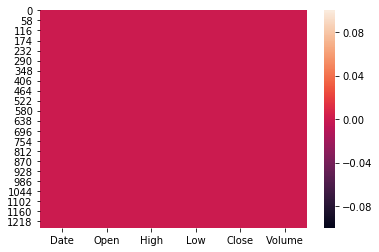

In [5]:
sns.heatmap(dataset_train.isnull())

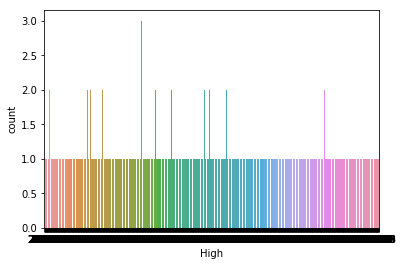

In [6]:
sns.countplot(dataset_train['High'],label='count')

In [7]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


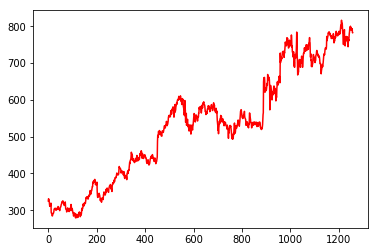

In [8]:
plt.plot(training_set,color='red',label='5 years of Google Stock Price')

Stage 2: Data Preprocessing: The pre-processing stage involves a) Data discretization: Part of data reduction but with particular importance, especially for numerical data b) Data transformation: Normalization. c) Data cleaning: Fill in missing values. d) Data integration: Integration of data files. After the dataset is transformed into a clean dataset, the dataset is divided into training and testing sets so as to evaluate. Creating a data structure with 60 timesteps and 1 output

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

Stage 3: Feature Extraction: In this layer, only the features which are to be fed to the neural network are chosen. We will choose the feature from Date, open, high, low, close, and volume.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


Stage 4: Training Neural Network: In this stage, the data is fed to the neural network and trained for prediction assigning random biases and weights. Our LSTM model is composed of a sequential input layer followed by 3 LSTM layers and dense layer with activation and then finally a dense output layer with linear activation function.

In [12]:
#Initialising RNN
regressor = Sequential()

In [13]:
regressor.add(LSTM(units =50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.add(LSTM(units =50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units =50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
X_train.shape

(1198, 60, 1)

In [20]:
y_train.shape

(1198,)

In [21]:
#Fitting RNN
regressor.fit(X_train,y_train, epochs =1000, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 11s 9ms/step - loss: 0.0456
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] 

In [0]:
dataset_test = pd.read_csv('gdrive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')
dataset_test.head()
real_stock_price = dataset_test.iloc[:,1:2].values

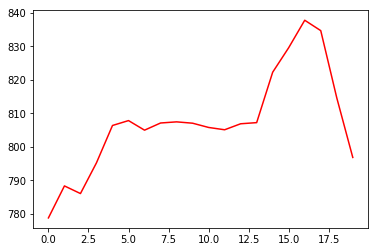

In [27]:
plt.plot(real_stock_price,color = 'red', label = 'Real Google Stock Price')

In [0]:
#Getting the predicted stock price 
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs =inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  


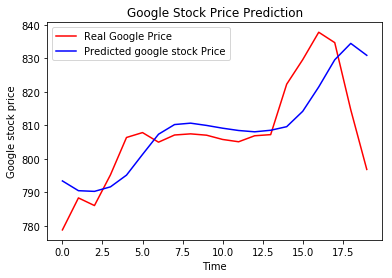

In [29]:
plt.plot(real_stock_price,color='red',label = "Real Google Price")
plt.plot(predicted_stock_price, color='blue',label = 'Predicted google stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()